# Introduction : Analyse du jeu de données MPG

Dans ce tutoriel, nous allons explorer en détail le jeu de données "mpg". Ce jeu de données, initialement publié par la bibliothèque StatLib de l'Université Carnegie Mellon et désormais disponible dans la bibliothèque Seaborn. L'objectif de ce tutoriel est d'explorer la relation entre la consommation de carburant (Miles Per Gallon, ou MPG) et diverses autres caractéristiques de ce jeu de données.

Le jeu de données "mpg" est particulièrement intéressant pour notre étude car il présente une combinaison de caractéristiques discrètes et continues. Il contient :

- 3 caractéristiques discrètes : Ces variables catégorielles nous permettront d'analyser des groupes ou des classifications au sein des données.
- 5 caractéristiques continues : Ces variables numériques nous permettront d'examiner des relations et des tendances quantitatives.

In [1]:
import seaborn as sns
# load a seaborn dataset
mpg_df = sns.load_dataset("mpg")
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


#  2. Nettoyage des données

In [14]:
mpg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

# 3. Analyse univariée (discrètes et continues)

### Variables discrètes :
cylinders | model_year | origin

C:\Users\kmill\AppData\Local\Temp\ipykernel_29712\3999367190.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=mpg_clean, x='cylinders', ax=axes[0], palette="Blues_d")
C:\Users\kmill\AppData\Local\Temp\ipykernel_29712\3999367190.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=mpg_clean, x='origin', ax=axes[1], palette="Greens_d")


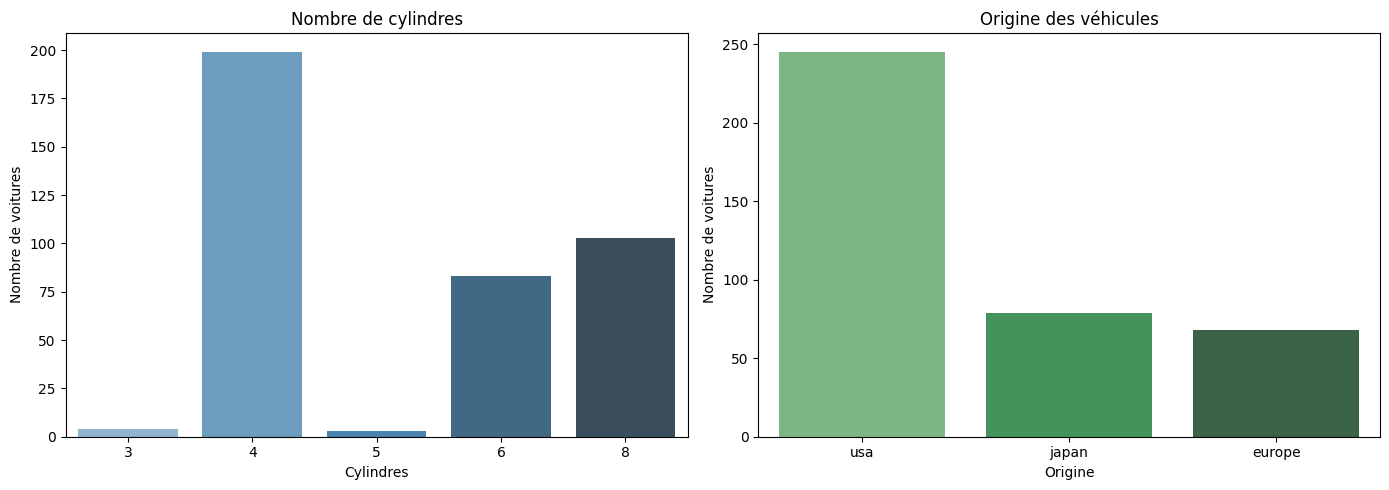

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Définir la taille générale de la figure
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # 1 ligne, 2 colonnes

# Graphique 1 : Nombre de cylindres
sns.countplot(data=mpg_clean, x='cylinders', ax=axes[0], palette="Blues_d")
axes[0].set_title('Nombre de cylindres')
axes[0].set_xlabel('Cylindres')
axes[0].set_ylabel('Nombre de voitures')

# Graphique 2 : Origine des véhicules
sns.countplot(data=mpg_clean, x='origin', ax=axes[1], palette="Greens_d")
axes[1].set_title("Origine des véhicules")
axes[1].set_xlabel('Origine')
axes[1].set_ylabel('Nombre de voitures')

# Affichage
plt.tight_layout()
plt.show()

### Analyse de la distribution de la consommation MPG

Text(0.5, 1.0, 'Distribution de la consommation (MPG)')

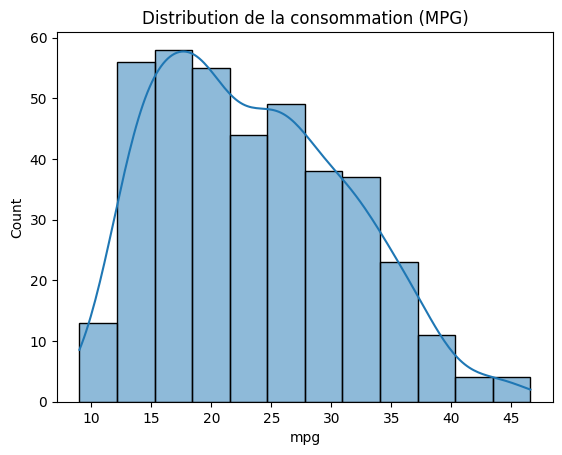

In [19]:
# Histogramme pour mpg
sns.histplot(data=mpg_clean, x='mpg', kde=True)
plt.title("Distribution de la consommation (MPG)")

# 4. Analyse bivariée : relations avec la consommation (MPG)

### Analyse MPG vs Puissance des voitures

Text(0.5, 1.0, 'MPG vs Horsepower')

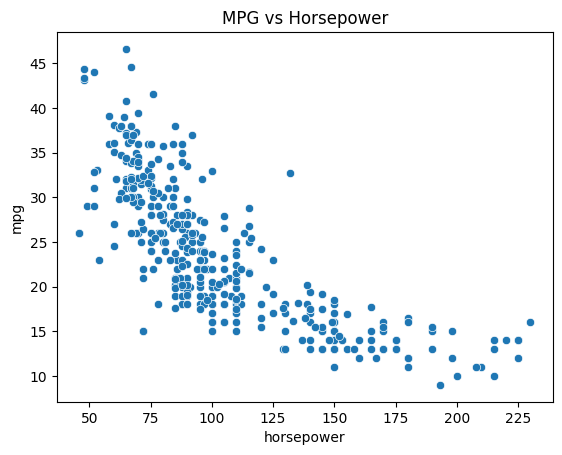

In [16]:
sns.scatterplot(data=mpg_clean, x='horsepower', y='mpg')
plt.title("MPG vs Horsepower")

### Analyse MPG vs Poids des voitures

Text(0.5, 1.0, 'MPG vs Weight')

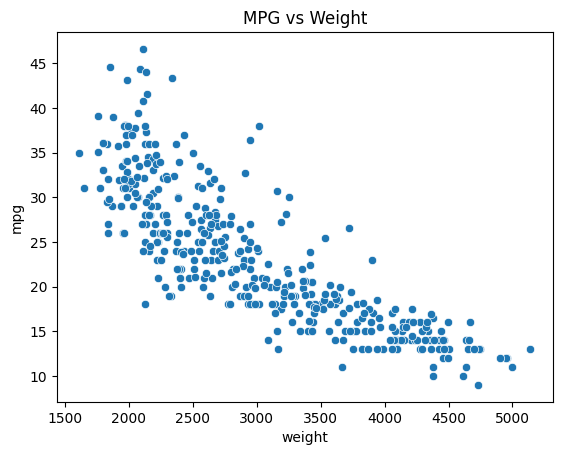

In [17]:
sns.scatterplot(data=mpg_clean, x='weight', y='mpg')
plt.title("MPG vs Weight")

### Analyse de la distribution de MPG selon l'origine

Text(0.5, 1.0, "Distribution de MPG selon l'origine")

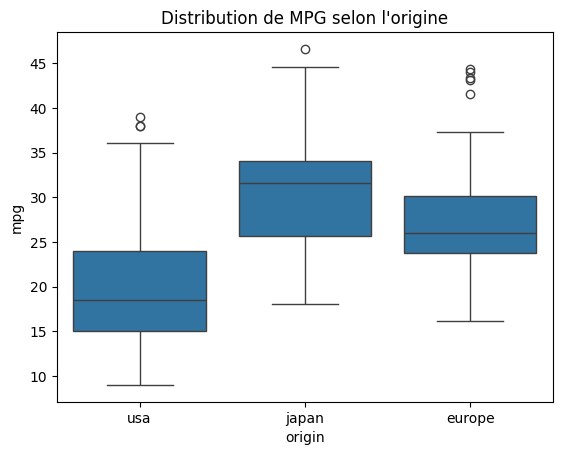

In [11]:
sns.boxplot(data=mpg_clean, x='origin', y='mpg')
plt.title("Distribution de MPG selon l'origine")

# 5. Corrélation entre les variables continues

Text(0.5, 1.0, 'Corrélation entre les variables continues')

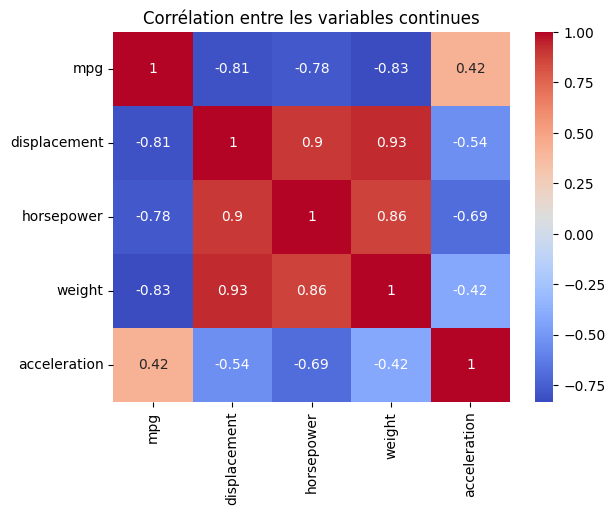

In [12]:
import numpy as np

# Matrice de corrélation
corr = mpg_clean[['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']].corr()

# Heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Corrélation entre les variables continues")

# 6. Régression simple : prédire MPG

Text(0.5, 1.0, 'Régression linéaire : MPG vs Weight')

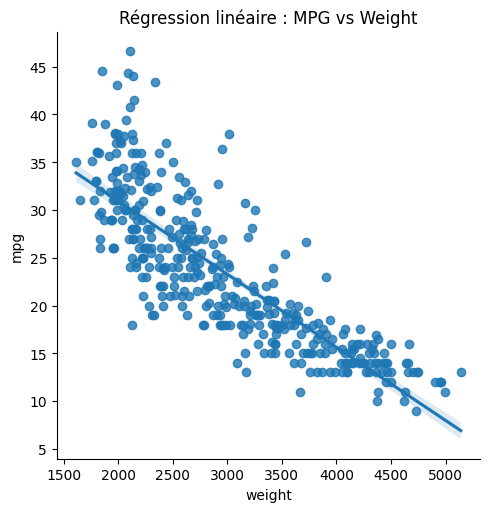

In [13]:
sns.lmplot(data=mpg_clean, x='weight', y='mpg')
plt.title("Régression linéaire : MPG vs Weight")